# Best Classifier- Loan case study

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('loan_train.csv')
dataset.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
dataset.shape

(346, 10)

In [4]:
dataset.count()

Unnamed: 0        346
Unnamed: 0.1      346
loan_status       346
Principal         346
terms             346
effective_date    346
due_date          346
age               346
education         346
Gender            346
dtype: int64

In [5]:
dataset.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [6]:
dataset.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [7]:
dataset.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1, inplace = True)
dataset.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
dataset.rename(columns={'Principal': 'principal', "Gender": "gender"}, inplace = True)
dataset.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [9]:
dataset.shape

(346, 8)

In [10]:
# Standardizing Text & Fixing Typos
print(dataset['loan_status'].unique())
print(dataset['education'].unique())
print(dataset['gender'].unique())

['PAIDOFF' 'COLLECTION']
['High School or Below' 'Bechalor' 'college' 'Master or Above']
['male' 'female']


In [11]:

dataset['loan_status'] = dataset['loan_status'].apply(lambda x: 'paid_off' if (x == 'PAIDOFF')  else 'defaulted')
dataset.loc[dataset.education == 'High School or Below', 'education'] = 'high_school_or_below'
dataset.loc[dataset.education == 'college', 'education'] = 'college'
dataset.loc[dataset.education == 'Bechalor', 'education'] = 'bachelor'
dataset.loc[dataset.education == 'Master or Above', 'education'] = 'master_or_above'

dataset.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paid_off,1000,30,9/8/2016,10/7/2016,45,high_school_or_below,male
1,paid_off,1000,30,9/8/2016,10/7/2016,33,bachelor,female
2,paid_off,1000,15,9/8/2016,9/22/2016,27,college,male
3,paid_off,1000,30,9/9/2016,10/8/2016,28,college,female
4,paid_off,1000,30,9/9/2016,10/8/2016,29,college,male


In [12]:
print(dataset['loan_status'].unique())
print(dataset['education'].unique())
print(dataset['gender'].unique())

['paid_off' 'defaulted']
['high_school_or_below' 'bachelor' 'college' 'master_or_above']
['male' 'female']


In [13]:
# Convert to date time object
dataset['due_date'] = pd.to_datetime(dataset['due_date'])
dataset['effective_date'] = pd.to_datetime(dataset['effective_date'])

dataset.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paid_off,1000,30,2016-09-08,2016-10-07,45,high_school_or_below,male
1,paid_off,1000,30,2016-09-08,2016-10-07,33,bachelor,female
2,paid_off,1000,15,2016-09-08,2016-09-22,27,college,male
3,paid_off,1000,30,2016-09-09,2016-10-08,28,college,female
4,paid_off,1000,30,2016-09-09,2016-10-08,29,college,male


In [14]:
dataset['dayofweek_getloan'] = dataset['effective_date'].dt.dayofweek
dataset['dayofweek_dueloan'] = dataset['due_date'].dt.dayofweek
dataset.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,dayofweek_getloan,dayofweek_dueloan
0,paid_off,1000,30,2016-09-08,2016-10-07,45,high_school_or_below,male,3,4
1,paid_off,1000,30,2016-09-08,2016-10-07,33,bachelor,female,3,4
2,paid_off,1000,15,2016-09-08,2016-09-22,27,college,male,3,3
3,paid_off,1000,30,2016-09-09,2016-10-08,28,college,female,4,5
4,paid_off,1000,30,2016-09-09,2016-10-08,29,college,male,4,5


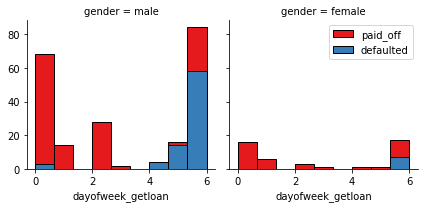

In [15]:
bins = np.linspace(dataset.dayofweek_getloan.min(), dataset.dayofweek_getloan.max(), 10)
g = sns.FacetGrid(dataset, col = "gender", hue="loan_status", palette="Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek_getloan', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

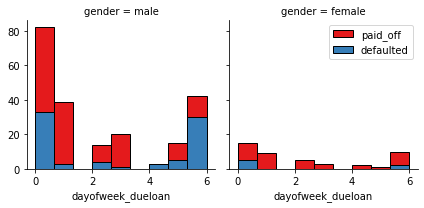

In [16]:
bins = np.linspace(dataset.dayofweek_dueloan.min(), dataset.dayofweek_dueloan.max(), 10)
g = sns.FacetGrid(dataset, col = "gender", hue="loan_status", palette="Set1", col_wrap = 2)
g.map(plt.hist, 'dayofweek_dueloan', bins = bins, ec = "k")
g.axes[-1].legend()
plt.show()

In [17]:
#encode effective_date weekend
dataset['weekend_getloan'] = dataset['dayofweek_getloan'].apply(lambda x: 1 if (x > 3)  else 0)

#encode monday and sunday of due_date
dataset['startendweek_dueloan'] = dataset['dayofweek_dueloan'].apply(lambda x: 1 if (x == 0 or x == 6)  else 0)

#encode gender
gender_dummy = pd.get_dummies(dataset.gender)

#encode education
edu_dummy = pd.get_dummies(dataset.education)

#combined all new encoded features to dataframe
dataset = pd.concat([dataset, gender_dummy, edu_dummy], axis = 1)

#encode loan_status
dataset['loan_stat'] = dataset['loan_status'].apply(lambda x: 1 if (x == 'paid_off')  else 0)

#remove unused column.
dataset.drop(['loan_status','effective_date', 'due_date', 'dayofweek_getloan', 'dayofweek_dueloan', 'education','gender'], axis = 1, inplace = True)

dataset.head()

,principal,terms,age,weekend_getloan,startendweek_dueloan,female,male,bachelor,college,high_school_or_below,master_or_above,loan_stat
0,1000,30,45,0,0,0,1,0,0,1,0,1
1,1000,30,33,0,0,1,0,1,0,0,0,1
2,1000,15,27,0,0,0,1,0,1,0,0,1
3,1000,30,28,1,0,1,0,0,1,0,0,1
4,1000,30,29,1,0,0,1,0,1,0,0,1


In [18]:
dataset.dtypes

principal               int64
terms                   int64
age                     int64
weekend_getloan         int64
startendweek_dueloan    int64
female                  uint8
male                    uint8
bachelor                uint8
college                 uint8
high_school_or_below    uint8
master_or_above         uint8
loan_stat               int64
dtype: object

In [19]:
dataset.astype({'female':'float64','male':'float64','bachelor':'float64','college':'float64','high_school_or_below':'float64','master_or_above':'float64'}).dtypes

principal                 int64
terms                     int64
age                       int64
weekend_getloan           int64
startendweek_dueloan      int64
female                  float64
male                    float64
bachelor                float64
college                 float64
high_school_or_below    float64
master_or_above         float64
loan_stat                 int64
dtype: object

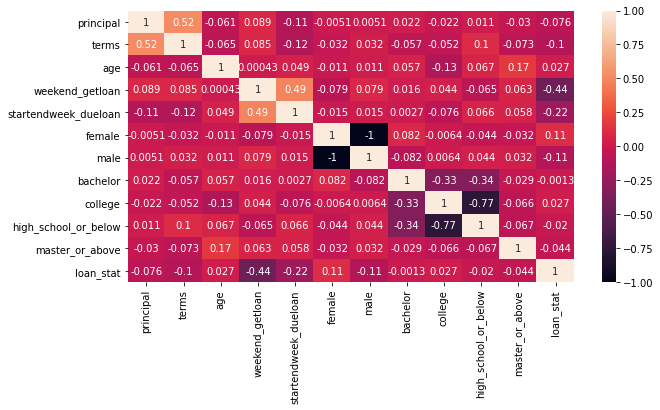

In [20]:
plt.figure(figsize=(10, 5))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [22]:
print (X)

[[1000   30   45 ...    0    1    0]
 [1000   30   33 ...    0    0    0]
 [1000   15   27 ...    1    0    0]
 ...
 [ 800   15   39 ...    1    0    0]
 [1000   30   28 ...    1    0    0]
 [1000   30   26 ...    1    0    0]]


In [23]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Splitting the dataset into the Training set and Test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [25]:
print (X_train)

[[ 800   15   28 ...    1    0    0]
 [ 800   15   31 ...    0    0    0]
 [1000   15   40 ...    1    0    0]
 ...
 [1000   15   47 ...    0    1    0]
 [1000   30   27 ...    0    1    0]
 [1000   30   20 ...    1    0    0]]


In [26]:
print(y_train)

[0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1]


In [27]:
print(X_test)

[[1000   30   25 ...    0    1    0]
 [1000   30   35 ...    1    0    0]
 [ 800   30   33 ...    0    1    0]
 ...
 [1000   30   27 ...    0    1    0]
 [1000   30   35 ...    0    0    0]
 [1000   30   31 ...    0    1    0]]


In [28]:
print(y_test)

[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 1 1 1 1]


## Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [30]:
print(X_train)

[[-1  0  0 ...  1  0  0]
 [-1  0  0 ...  0  0  0]
 [ 0  0  1 ...  1  0  0]
 ...
 [ 0  0  2 ...  0  1  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0 -1 ...  1  0  0]]


In [31]:
print(X_test)

[[ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  1  0  0]
 [-1  0  0 ...  0  1  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  0]]


## Classifier 1- K Nearest Neighbor (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = classifier1.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]]


## Making the Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11 10]
 [21 80]]


0.7459016393442623

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [36]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7459016393442623
[[11 10]
 [21 80]]
              precision    recall  f1-score   support

           0       0.34      0.52      0.42        21
           1       0.89      0.79      0.84       101

    accuracy                           0.75       122
   macro avg       0.62      0.66      0.63       122
weighted avg       0.80      0.75      0.76       122

0.8376963350785341


## Choosing Best Value of k



Minimum error:- 0.1721311475409836 at K = 24


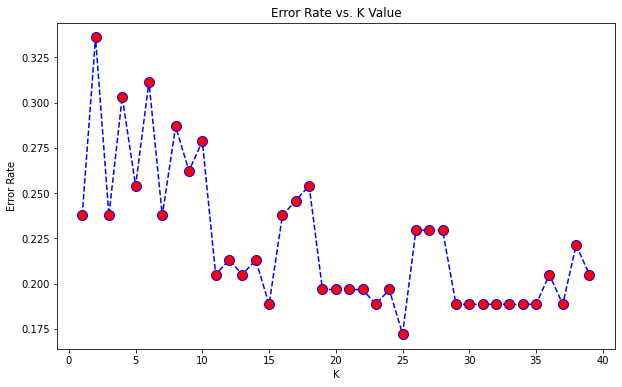

In [37]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [38]:
import sklearn.metrics as metrics

In [72]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)


# Model tuning with Best value of K

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [44]:
y_pred1 = classifier1.predict(X_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [45]:
accuracy_score_KNN=(accuracy_score(y_test, y_pred1))
print (accuracy_score_KNN)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
f1_score_KNN=f1_score(y_test, y_pred1,average='weighted')
print(f1_score_KNN)

0.819672131147541
[[  0  21]
 [  1 100]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.83      0.99      0.90       101

    accuracy                           0.82       122
   macro avg       0.41      0.50      0.45       122
weighted avg       0.68      0.82      0.75       122

0.745827795008123


In [46]:
from sklearn.metrics import jaccard_similarity_score
j1=jaccard_similarity_score(y_test,y_pred1)
print(j1)

0.819672131147541


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Classifier 2 Decesion Tree


In [47]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
y_pred2 = classifier2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]]


In [49]:
accuracy_score_decesion_tree = accuracy_score(y_test, y_pred2)
print(accuracy_score_decesion_tree)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
f1_score_decesion_tree=f1_score(y_test, y_pred2,average='weighted')
print(f1_score_decesion_tree)   

0.7459016393442623
[[ 7 14]
 [17 84]]
              precision    recall  f1-score   support

           0       0.29      0.33      0.31        21
           1       0.86      0.83      0.84       101

    accuracy                           0.75       122
   macro avg       0.57      0.58      0.58       122
weighted avg       0.76      0.75      0.75       122

0.7524562704231541


In [50]:
from sklearn.metrics import jaccard_similarity_score
j2=jaccard_similarity_score(y_test,y_pred2)
print(j2)

0.7459016393442623


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Classifier 3- Support vector machine

In [51]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
y_pred3 = classifier3.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]]


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[ 0 21]
 [ 3 98]]


0.8032786885245902

In [54]:
accuracy_score_SVM=accuracy_score(y_test, y_pred3)
print(accuracy_score_SVM)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
f1_score_SVM=f1_score(y_test, y_pred3,average='weighted')
print(f1_score_SVM)

0.8032786885245902
[[ 0 21]
 [ 3 98]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.82      0.97      0.89       101

    accuracy                           0.80       122
   macro avg       0.41      0.49      0.45       122
weighted avg       0.68      0.80      0.74       122

0.7375558867362146


In [55]:
from sklearn.metrics import jaccard_similarity_score
j3=jaccard_similarity_score(y_test,y_pred3)
print(j3)

0.8032786885245902


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Classifier 4- Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression
classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred4 = classifier4.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]]


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score_logistic_regression = accuracy_score(y_test, y_pred4)
print (accuracy_score_logistic_regression)

[[  0  21]
 [  0 101]]
0.8278688524590164


In [59]:
print(accuracy_score(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))
f1_score_logistic_regression=f1_score(y_test, y_pred4,average='weighted')
print(f1_score_logistic_regression)

0.8278688524590164
[[  0  21]
 [  0 101]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.83      1.00      0.91       101

    accuracy                           0.83       122
   macro avg       0.41      0.50      0.45       122
weighted avg       0.69      0.83      0.75       122

0.7499081085054768


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import jaccard_similarity_score
j4=jaccard_similarity_score(y_test,y_pred4)
print(j4)


0.8278688524590164


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [61]:
yhat = classifier4.predict(X_test)
yhat
yhat_prob4 = classifier4.predict_proba(X_test)
yhat_prob4

array([[0.20327176, 0.79672824],
       [0.17591982, 0.82408018],
       [0.247453  , 0.752547  ],
       [0.05644722, 0.94355278],
       [0.23486168, 0.76513832],
       [0.01902115, 0.98097885],
       [0.04736916, 0.95263084],
       [0.247453  , 0.752547  ],
       [0.05491889, 0.94508111],
       [0.12303679, 0.87696321],
       [0.11993468, 0.88006532],
       [0.05089287, 0.94910713],
       [0.18017351, 0.81982649],
       [0.13676882, 0.86323118],
       [0.0649402 , 0.9350598 ],
       [0.06672772, 0.93327228],
       [0.24207993, 0.75792007],
       [0.17591982, 0.82408018],
       [0.02995411, 0.97004589],
       [0.20327176, 0.79672824],
       [0.17591982, 0.82408018],
       [0.26839319, 0.73160681],
       [0.02502378, 0.97497622],
       [0.05644722, 0.94355278],
       [0.20327176, 0.79672824],
       [0.06022635, 0.93977365],
       [0.20327176, 0.79672824],
       [0.26839319, 0.73160681],
       [0.24207993, 0.75792007],
       [0.247453  , 0.752547  ],
       [0.

In [62]:

from sklearn.metrics import jaccard_similarity_score
j1=jaccard_similarity_score(y_test,y_pred4)
print(j1)
from sklearn.metrics import log_loss
Log_loss_logR=log_loss(y_test, yhat_prob4)
print (Log_loss_logR)

0.8278688524590164
0.4291561883861481


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Summery of Classifiers Report

In [63]:
print(" Classifier 1- K Nearest neighbor")
print("Accuracy_score KNN :  : % 2f" % accuracy_score_KNN)
print("f1_score KNN :        : % 2f" % f1_score_KNN)

 Classifier 1- K Nearest neighbor
Accuracy_score KNN :  :  0.819672
f1_score KNN :        :  0.745828


In [64]:
print(" Classifier 2- Decesion Tree")
print("Accuracy_score Decesion Tree :  : % 2f" % accuracy_score_decesion_tree)
print("f1_score Decesion Tree :        : % 2f" % f1_score_decesion_tree)

 Classifier 2- Decesion Tree
Accuracy_score Decesion Tree :  :  0.745902
f1_score Decesion Tree :        :  0.752456


In [65]:
print(" Classifier 3- Support Vector Machine")
print("Accuracy_score SVM :  : % 2f" % accuracy_score_SVM)
print("f1_score SVM :        : % 2f" % f1_score_SVM)

 Classifier 3- Support Vector Machine
Accuracy_score SVM :  :  0.803279
f1_score SVM :        :  0.737556


In [66]:
print(" Classifier 4- Logistic regression")
print("LogLoss_Logistic regression:          : % 2f" % Log_loss_logR)
print("Accuracy_score Logistic regression :  : % 2f" % accuracy_score_logistic_regression)
print("f1_score Logistic regression :        : % 2f" % f1_score_logistic_regression)

 Classifier 4- Logistic regression
LogLoss_Logistic regression:          :  0.429156
Accuracy_score Logistic regression :  :  0.827869
f1_score Logistic regression :        :  0.749908


In [73]:
# Jaccard setup
from sklearn.metrics import jaccard_similarity_score

# evaluate KNN
knn_yhat = classifier1.predict(X_test)
j_1 = round(jaccard_similarity_score(y_test, y_pred1), 2)
# evaluate Decision Trees
dt_yhat = classifier2.predict(X_test)
j_2 = round(jaccard_similarity_score(y_test, y_pred2), 2)
#evaluate SVM
svm_yhat = classifier3.predict(X_test)
j_3 = round(jaccard_similarity_score(y_test, y_pred3), 2)
# evaluate Logistic Regression
lr_yhat = classifier4.predict(X_test)
j_4 = round(jaccard_similarity_score(y_test, y_pred4), 2)

list_jaccard = [j_1, j_2, j_3, j_4]
list_jaccard

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/me

[0.82, 0.75, 0.8, 0.83]

In [74]:
# F1-score setup
from sklearn.metrics import f1_score

# evaluate KNN
f_s1 = round(f1_score(y_test, y_pred1, average='weighted'), 2)
# evaluate Desision Trees 
f_s2 = round(f1_score(y_test, y_pred2, average='weighted'), 2)
# evaluate SVM
f_s3 = round(f1_score(y_test, y_pred3, average='weighted'), 2)
# evaluate Logistic Regression
f_s4 = round(f1_score(y_test, y_pred4, average='weighted'), 2)

list_f1_score = [f_s1, f_s2, f_s3, f_s4]
list_f1_score

[0.75, 0.75, 0.74, 0.75]

In [76]:
# LogLoss
from sklearn.metrics import log_loss
yhat_prob4 = classifier4.predict_proba(X_test)
list_log_loss = ['NA', 'NA', 'NA', round(log_loss(y_test, yhat_prob4), 2)]
list_log_loss

['NA', 'NA', 'NA', 0.43]

In [70]:
import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.82,0.75,NA
Decision Tree,0.75,0.75,NA
SVM,0.80,0.74,NA
Logistic Regression,0.83,0.75,0.43
